<a href="https://colab.research.google.com/github/r-rahulsingh/GradientDescent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

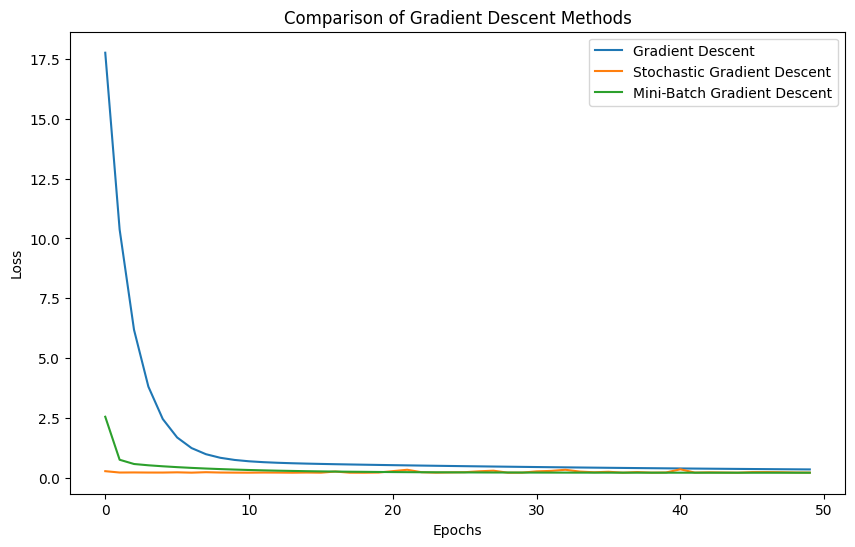

GD Weights: [3.73909782 3.52196741]
SGD Weights: [3.16842745 4.56056782]
Mini-Batch GD Weights: [3.13999042 4.69954187]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 5 * X + 3 + np.random.randn(100, 1) * 0.5

# Add a bias column for linear regression
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Loss function and gradient
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def compute_gradient(X_b, y, weights):
    m = len(y)
    y_pred = X_b.dot(weights)
    gradients = -2 / m * X_b.T.dot(y - y_pred)
    return gradients

# Gradient Descent Variants
def gradient_descent(X_b, y, lr=0.1, epochs=50):
    weights = np.zeros((X_b.shape[1], 1))
    losses = []
    for epoch in range(epochs):
        gradients = compute_gradient(X_b, y, weights)
        weights -= lr * gradients
        losses.append(compute_loss(y, X_b.dot(weights)))
    return weights, losses

def stochastic_gradient_descent(X_b, y, lr=0.1, epochs=50):
    weights = np.zeros((X_b.shape[1], 1))
    losses = []
    for epoch in range(epochs):
        for i in range(len(y)):
            random_index = np.random.randint(len(y))
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = -2 * xi.T.dot(yi - xi.dot(weights))
            weights -= lr * gradients
        losses.append(compute_loss(y, X_b.dot(weights)))
    return weights, losses

def mini_batch_gradient_descent(X_b, y, batch_size=20, lr=0.1, epochs=50):
    weights = np.zeros((X_b.shape[1], 1))
    losses = []
    for epoch in range(epochs):
        indices = np.random.permutation(len(y))
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]
        for i in range(0, len(y), batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = -2 / len(xi) * xi.T.dot(yi - xi.dot(weights))
            weights -= lr * gradients
        losses.append(compute_loss(y, X_b.dot(weights)))
    return weights, losses

# Train models using each method
gd_weights, gd_losses = gradient_descent(X_b, y)
sgd_weights, sgd_losses = stochastic_gradient_descent(X_b, y)
mbgd_weights, mbgd_losses = mini_batch_gradient_descent(X_b, y)

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(gd_losses, label="Gradient Descent")
plt.plot(sgd_losses, label="Stochastic Gradient Descent")
plt.plot(mbgd_losses, label="Mini-Batch Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.show()

# Final Weights
print("GD Weights:", gd_weights.ravel())
print("SGD Weights:", sgd_weights.ravel())
print("Mini-Batch GD Weights:", mbgd_weights.ravel())


In [4]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with noise

# Scale the features for SGD and Mini-Batch GD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. **Gradient Descent (Exact Solution using LinearRegression)**
lin_reg = LinearRegression()
lin_reg.fit(X, y)
gd_intercept = lin_reg.intercept_[0]
gd_coef = lin_reg.coef_[0][0]

# 2. **Stochastic Gradient Descent (SGD using SGDRegressor)**
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_scaled, y.ravel())
sgd_intercept = sgd_reg.intercept_[0]
sgd_coef = sgd_reg.coef_[0]

# 3. **Mini-Batch Gradient Descent (Simulated using SGDRegressor)**
mbgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
mbgd_reg.fit(X_scaled, y.ravel())
mbgd_intercept = mbgd_reg.intercept_[0]
mbgd_coef = mbgd_reg.coef_[0]

# Predictions for comparison
y_pred_gd = lin_reg.predict(X)
y_pred_sgd = sgd_reg.predict(X_scaled)
y_pred_mbgd = mbgd_reg.predict(X_scaled)

# Compute Mean Squared Error (MSE)
mse_gd = mean_squared_error(y, y_pred_gd)
mse_sgd = mean_squared_error(y, y_pred_sgd)
mse_mbgd = mean_squared_error(y, y_pred_mbgd)

# Print Results
print("Results:")
print(f"Gradient Descent (Exact Solution): Intercept = {gd_intercept:.4f}, Coefficient = {gd_coef:.4f}, MSE = {mse_gd:.4f}")
print(f"Stochastic Gradient Descent: Intercept = {sgd_intercept:.4f}, Coefficient = {sgd_coef:.4f}, MSE = {mse_sgd:.4f}")
print(f"Mini-Batch Gradient Descent: Intercept = {mbgd_intercept:.4f}, Coefficient = {mbgd_coef:.4f}, MSE = {mse_mbgd:.4f}")

Results:
Gradient Descent (Exact Solution): Intercept = 4.2151, Coefficient = 2.7701, MSE = 0.8066
Stochastic Gradient Descent: Intercept = 6.7821, Coefficient = 1.6288, MSE = 0.8081
Mini-Batch Gradient Descent: Intercept = 6.7821, Coefficient = 1.6288, MSE = 0.8081
